In [1]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Imprimeix la taula de describe() només des de la fila 45 fins a la 68

In [37]:
df_4568 = df[:][45:69] #el 69 no s'inclou

df_4568.describe()

,age,bmi,children,charges
count,24.000000,24.000000,24.000000,24.000000
mean,38.375000,31.503958,1.250000,15380.546530
std,15.747498,5.280530,1.151558,13523.381241
min,18.000000,22.420000,0.000000,1743.214000
25%,24.000000,27.098750,0.000000,4411.907213
50%,38.000000,32.727500,1.000000,10618.057050
75%,53.500000,35.766250,2.000000,23325.660650
max,64.000000,39.100000,4.000000,47496.494450


### Calcula la suma dels valors bmi d’aquest interval i la mitjana dels charges.

In [38]:

df_4568['bmi'].sum()


756.095

In [39]:
df_4568['charges'].mean()

15380.546530416666

### Del mateix interval de files del punt anterior, mostra només els primers 12 registres en sentit descendent, segons els valors de bmi. 

In [40]:

df_4568.sort_values(['bmi'],ascending=False).head(12)

,age,sex,bmi,children,smoker,region,charges
66,61,female,39.100,2,no,southwest,14235.07200
46,18,female,38.665,2,no,northeast,3393.35635
59,34,female,37.335,2,no,northwest,5989.52365
45,55,male,37.300,0,no,southwest,20630.28351
55,58,male,36.955,2,yes,northwest,47496.49445
68,40,female,36.190,0,no,southeast,5920.10410
50,18,female,35.625,0,no,northeast,2211.13075
49,36,male,35.200,1,yes,southeast,38709.17600
47,28,female,34.770,0,no,northwest,3556.92230
53,36,male,34.430,0,yes,southeast,37742.57570


In [41]:
# Aplica, després, un segon nivell amb els valors de charges, mantenint, per a aquest, 
# el sentit predeterminat i canviant el sentit del primer nivell per ordre ascendent.

df_4568.sort_values(['bmi', 'charges']).head(12)

,age,sex,bmi,children,smoker,region,charges
64,20,female,22.420,0,yes,northwest,14711.74380
58,53,female,22.880,1,yes,southeast,23244.79020
48,60,female,24.530,0,no,southeast,12629.89670
62,64,male,24.700,1,no,northwest,30166.61817
63,28,female,25.935,1,no,northwest,4133.64165
67,40,male,26.315,1,no,northwest,6389.37785
60,43,male,27.360,3,no,northeast,8606.21740
52,48,male,28.000,1,yes,southwest,23568.27200
54,40,female,28.690,3,no,northwest,8059.67910
65,19,female,28.900,0,no,southwest,1743.21400


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Torna a la base de dades principal i digues quantes persones fumadores hi ha a la zona northwest. 

In [47]:

group1 = df.groupby(['region','smoker']).size()
group1

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
dtype: int64

<Axes: xlabel='region'>

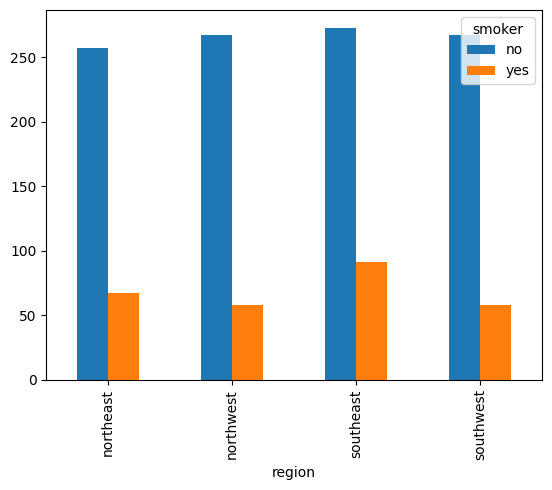

In [48]:
group1.unstack(fill_value=0).plot.bar()

### Sabries dir la mitjana del nombre de fills o filles que hi ha a cada regió? Pots visualitzar les dades amb un gràfic?

In [43]:
mitjana_fills_regio = df.groupby(['region'])['children'].mean()
mitjana_fills_regio

region
northeast    1.046296
northwest    1.147692
southeast    1.049451
southwest    1.141538
Name: children, dtype: float64

Text(0.5, 1.0, 'Mitjana de fills per regió')

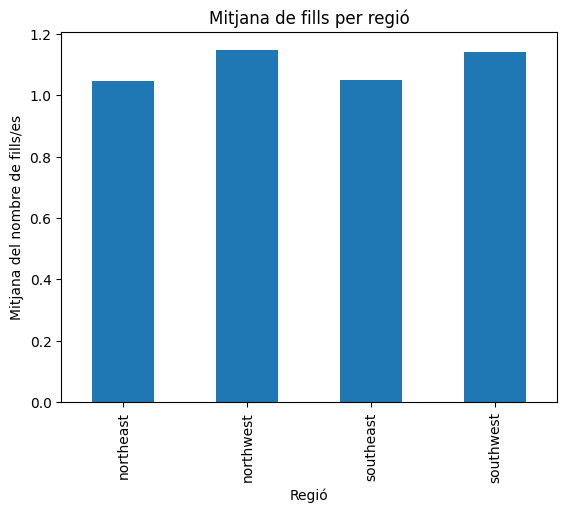

In [26]:
import matplotlib.pyplot as plt

mitjana_fills_regio.plot.bar()
plt.ylabel('Mitjana del nombre de fills/es')
plt.xlabel('Regió')
plt.title('Mitjana de fills per regió')

### Torna a la base de dades principal i crea’n una de nova només amb aquelles files que tinguin un bmi superior a 35 i que no siguin persones fumadores. 

In [32]:
df_bmi_ns = df.loc[(df.bmi>35)&(df.smoker=='no')]
df_bmi_ns

,age,sex,bmi,children,smoker,region,charges
13,56,female,39.820,0,no,southeast,11090.71780
18,56,male,40.300,0,no,southwest,10602.38500
20,60,female,36.005,0,no,northeast,13228.84695
41,31,female,36.630,2,no,southeast,4949.75870
44,38,male,37.050,1,no,northeast,6079.67150
...,...,...,...,...,...,...,...
1318,35,male,39.710,4,no,northeast,19496.71917
1322,62,male,38.830,0,no,southeast,12981.34570
1329,52,male,38.600,2,no,southwest,10325.20600
1332,52,female,44.700,3,no,southwest,11411.68500


### Com ho faries, si només es necessita complir una de les dues condicions? 

In [35]:
df_or = df.loc[(df.bmi>35)|(df.smoker=='no')]
df_or

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


### I, què passa, si afegim que l’edat ha de ser, obligatòriament, superior a 25 per ser una fila seleccionada, però mantenim que una de les dues primeres no és obligatòria?

In [36]:
df_3 = df.loc[(df.bmi>35)|(df.smoker=='no')&(df.age>25)]
df_3

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
...,...,...,...,...,...,...,...
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
